In [128]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import os
import pandas as pd
%matplotlib inline

In [129]:
def create_dataset(signal_data, look_back=1):
    dataX, dataY = [], []
    for i in range(len(signal_data)-look_back):
        dataX.append(signal_data[i:(i+look_back), 0])
        dataY.append(signal_data[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [130]:
look_back=24

In [131]:
os.getcwd()

'D:\\workspace\\DACON_2019\\DACON_DATASET\\revise_dataset'

In [132]:
os.chdir('D:\\workspace\\DACON_2019\\DACON_DATASET\\revise_dataset')

In [133]:
test = pd.read_csv('test_DACON_NA_avg_hour.csv')
test

,Time,X26,X303,X241,X435,X402,X352,X305,X350,X326,...,X283,X329,X223,X266,X20,X443,X347,X75,X107,X230
0,2017-07-01 00:00:00,1.187315,0.351692,0.264282,0.253713,0.176311,0.146826,0.307492,0.229566,0.061527,...,0.260910,0.317195,0.321455,0.367367,0.159644,0.204865,0.153908,0.275,0.021,0.303634
1,2017-07-01 01:00:00,1.186123,0.462480,0.287727,0.313939,0.184959,0.161964,0.394632,0.278938,0.071040,...,0.246349,0.289677,0.279606,0.295989,0.159288,0.246143,0.172024,0.222,0.021,0.323445
2,2017-07-01 02:00:00,1.168301,0.439076,0.295718,0.305454,0.187243,0.155218,0.374071,0.283294,0.073194,...,0.218539,0.236890,0.268077,0.243984,0.157027,0.247709,0.157602,0.237,0.021,0.326541
3,2017-07-01 03:00:00,1.163425,0.393705,0.292820,0.303389,0.181969,0.153222,0.352247,0.280866,0.071465,...,0.195375,0.198678,0.247191,0.206447,0.154466,0.239162,0.146758,0.229,0.020,0.320604
4,2017-07-01 04:00:00,1.398466,0.370926,0.295090,0.308605,0.181614,0.150549,0.336359,0.290058,0.073235,...,0.174982,0.173972,0.245303,0.216265,0.152014,0.234301,0.141317,0.202,0.021,0.336269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-06-30 19:00:00,1.255000,0.175000,0.430000,0.429000,0.169000,0.739000,0.573000,0.341000,0.127000,...,0.312000,0.381000,0.479000,0.858000,11.546000,0.428000,0.134000,3.519,0.027,0.286000
8756,2018-06-30 20:00:00,1.596000,1.692000,0.332000,0.366000,0.159000,0.255000,0.501000,0.281000,0.126000,...,0.327000,0.402000,0.725000,0.816000,11.591000,0.413000,0.206000,3.331,0.027,0.303000
8757,2018-06-30 21:00:00,1.379000,0.883000,0.435000,0.497000,0.166000,0.233000,0.634000,0.401000,0.439000,...,0.253000,0.401000,0.426000,0.659000,10.766000,0.466000,0.324000,3.416,0.026,0.253000
8758,2018-06-30 22:00:00,1.000000,0.539000,0.268000,0.459000,0.463000,0.454000,0.676000,0.543000,0.737000,...,0.332000,0.401000,0.353000,0.462000,0.312000,0.473000,0.402000,4.263,0.027,0.253000


In [134]:
test['Time'] = pd.to_datetime(test['Time']) 
test = test.set_index('Time')

In [135]:
signal_data = test.iloc[:, 0].to_frame()

In [136]:
scaler = MinMaxScaler(feature_range=(0, 1))
signal_data = scaler.fit_transform(signal_data)

In [137]:
train = signal_data[0:5952]
val = signal_data[5952:8520]
test = signal_data[8520:]

In [138]:
x_train, y_train = create_dataset(train, look_back)
x_val, y_val = create_dataset(val, look_back)
x_test, y_test = create_dataset(test, look_back)

In [139]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [140]:
x_train = np.squeeze(x_train)
x_val = np.squeeze(x_val)
x_test = np.squeeze(x_test)

In [141]:
model = Sequential()
model.add(Dense(32,input_dim=24,activation="relu"))
model.add(Dropout(0.3))
for i in range(2):
    model.add(Dense(32,activation="relu"))
    model.add(Dropout(0.3))
model.add(Dense(1))

In [142]:
model.compile(loss='mean_squared_error', optimizer='adagrad')

In [143]:
early_stop = EarlyStopping(monitor='val_loss', patience=50, verbose=1)

hist = model.fit(x_train, y_train, epochs=200, batch_size=32, validation_data=(x_val, y_val), callbacks=[early_stop])

Train on 5928 samples, validate on 2544 samples
Epoch 1/200
5928/5928 [==============================] - 1s 124us/step - loss: 0.0024 - val_loss: 0.0075
Epoch 2/200
5928/5928 [==============================] - 0s 40us/step - loss: 0.0011 - val_loss: 0.0071
Epoch 3/200
5928/5928 [==============================] - 0s 42us/step - loss: 8.5592e-04 - val_loss: 0.0071
Epoch 4/200
5928/5928 [==============================] - 0s 42us/step - loss: 7.3261e-04 - val_loss: 0.0072
Epoch 5/200
5928/5928 [==============================] - 0s 42us/step - loss: 6.2492e-04 - val_loss: 0.0073
Epoch 6/200
5928/5928 [==============================] - 0s 46us/step - loss: 5.6906e-04 - val_loss: 0.0072
Epoch 7/200
5928/5928 [==============================] - 0s 42us/step - loss: 5.2586e-04 - val_loss: 0.0072
Epoch 8/200
5928/5928 [==============================] - 0s 41us/step - loss: 4.9100e-04 - val_loss: 0.0072
Epoch 9/200
5928/5928 [==============================] - 0s 41us/step - loss: 4.6306e-04 - val_

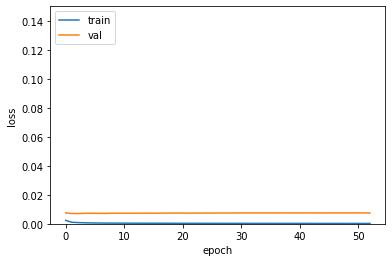

In [144]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylim(0.0, 0.15)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [145]:
trainScore = model.evaluate(x_train, y_train, verbose=0)
print('Train Score: ', trainScore)
valScore = model.evaluate(x_val, y_val, verbose=0)
print('Validataion Score: ', valScore)
testScore = model.evaluate(x_test, y_test, verbose=0)
print('Test Score: ', testScore)

Train Score:  0.00013811621706288335
Validataion Score:  0.007447700254156389
Test Score:  0.020555587330212195


In [146]:
look_ahead = 216
xhat = x_test[0, None]
predictions = np.zeros((look_ahead,1))
for i in range(look_ahead):
    prediction = model.predict(xhat, batch_size=32)
    predictions[i] = prediction
    xhat = np.hstack([xhat[:,1:],prediction])

In [147]:
predictions

array([[0.14780171],
       [0.13777344],
       [0.13153346],
       [0.13913845],
       [0.17678678],
       [0.202997  ],
       [0.19921683],
       [0.16338553],
       [0.18733871],
       [0.20423314],
       [0.20889457],
       [0.21142586],
       [0.21064065],
       [0.20405746],
       [0.19928366],
       [0.20664535],
       [0.19350214],
       [0.15302661],
       [0.15215117],
       [0.14413334],
       [0.14239125],
       [0.14011608],
       [0.13936359],
       [0.14818843],
       [0.15309907],
       [0.15245026],
       [0.15114692],
       [0.15518966],
       [0.19776918],
       [0.20238961],
       [0.19896832],
       [0.19745311],
       [0.19676751],
       [0.19668494],
       [0.20086105],
       [0.20613351],
       [0.2076236 ],
       [0.20642218],
       [0.2014851 ],
       [0.20191655],
       [0.19807598],
       [0.18112317],
       [0.16763152],
       [0.15127191],
       [0.14577973],
       [0.14233428],
       [0.14338547],
       [0.146

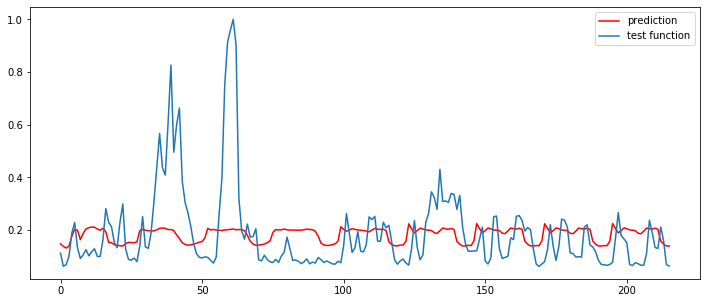

In [148]:
plt.figure(figsize=(12,5))
plt.plot(np.arange(look_ahead),predictions,'r',label="prediction")
plt.plot(np.arange(look_ahead),y_test[:look_ahead],label="test function")
plt.legend()
plt.show()

In [149]:
pred=scaler.inverse_transform(predictions)

In [150]:
predictions

array([[0.14780171],
       [0.13777344],
       [0.13153346],
       [0.13913845],
       [0.17678678],
       [0.202997  ],
       [0.19921683],
       [0.16338553],
       [0.18733871],
       [0.20423314],
       [0.20889457],
       [0.21142586],
       [0.21064065],
       [0.20405746],
       [0.19928366],
       [0.20664535],
       [0.19350214],
       [0.15302661],
       [0.15215117],
       [0.14413334],
       [0.14239125],
       [0.14011608],
       [0.13936359],
       [0.14818843],
       [0.15309907],
       [0.15245026],
       [0.15114692],
       [0.15518966],
       [0.19776918],
       [0.20238961],
       [0.19896832],
       [0.19745311],
       [0.19676751],
       [0.19668494],
       [0.20086105],
       [0.20613351],
       [0.2076236 ],
       [0.20642218],
       [0.2014851 ],
       [0.20191655],
       [0.19807598],
       [0.18112317],
       [0.16763152],
       [0.15127191],
       [0.14577973],
       [0.14233428],
       [0.14338547],
       [0.146

In [151]:
test=scaler.inverse_transform(y_test[:look_ahead].reshape(-1,1))

In [152]:
test

array([[1.18 ],
       [0.972],
       [0.999],
       [1.133],
       [1.503],
       [1.668],
       [1.266],
       [1.097],
       [1.153],
       [1.238],
       [1.138],
       [1.204],
       [1.251],
       [1.13 ],
       [1.127],
       [1.401],
       [1.888],
       [1.674],
       [1.6  ],
       [1.354],
       [1.267],
       [1.672],
       [1.963],
       [1.249],
       [1.083],
       [1.069],
       [1.104],
       [1.047],
       [1.297],
       [1.761],
       [1.277],
       [1.258],
       [1.508],
       [1.999],
       [2.546],
       [3.082],
       [2.539],
       [2.421],
       [3.257],
       [4.169],
       [2.785],
       [3.218],
       [3.486],
       [2.328],
       [1.988],
       [1.822],
       [1.611],
       [1.342],
       [1.176],
       [1.116],
       [1.104],
       [1.123],
       [1.113],
       [1.067],
       [1.024],
       [1.118],
       [1.792],
       [2.367],
       [3.849],
       [4.532],
       [4.725],
       [4.895],
       [

In [153]:
df_test = pd.DataFrame(data=test.flatten())
df_pred = pd.DataFrame(data=pred.flatten())

In [154]:
len(y_test[:look_ahead])

216

In [155]:
from SMAPE import *

In [156]:
len(df_test.columns)

1

In [157]:
smape_fast(df_test, df_pred)

ZeroDivisionError: float division by zero

In [158]:
from numba import jit
import math
out = 0

In [159]:
y_true = df_test.values.reshape(-1)
y_pred = df_pred.values.reshape(-1)


In [160]:
for i in range(y_true.shape[0]):
    a = y_true[i]
    b = y_pred[i]
    c = a+b
    if c == 0:
        continue
    out += math.fabs(a - b) / c
out *= (200.0 / y_true.shape[0])

In [161]:
out

25.822728378808815